### Global measures distributions in snapshots joint for treatments

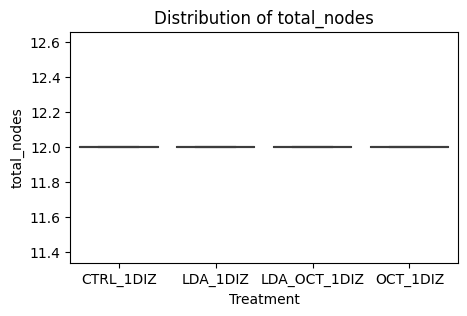

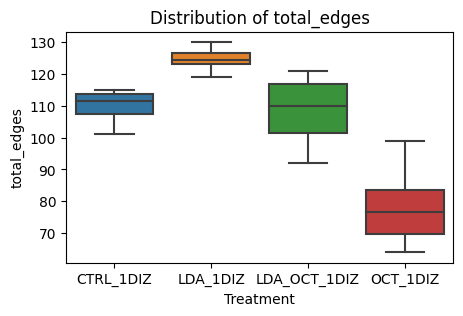

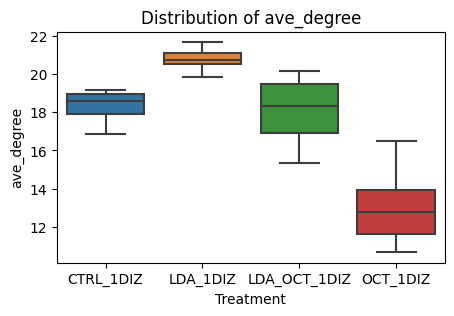

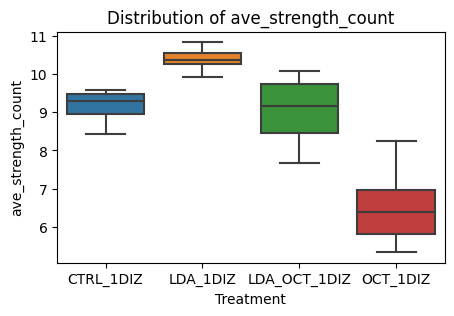

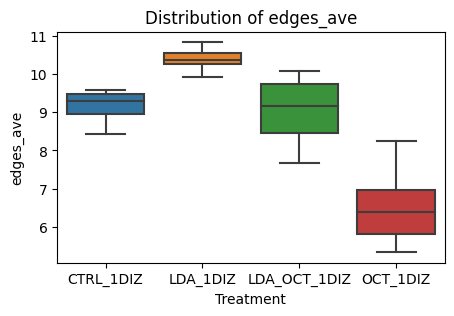

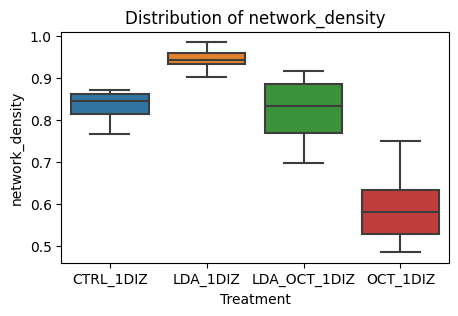

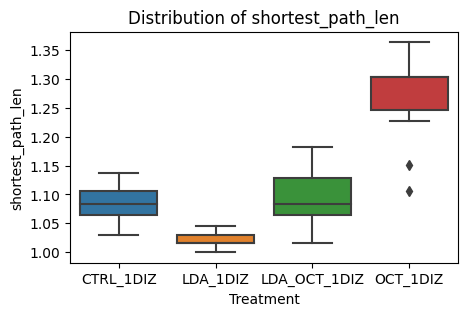

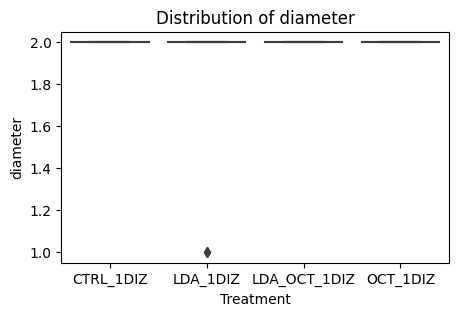

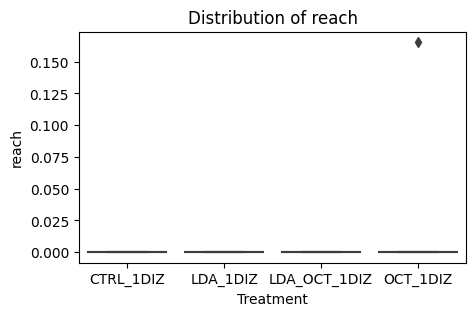

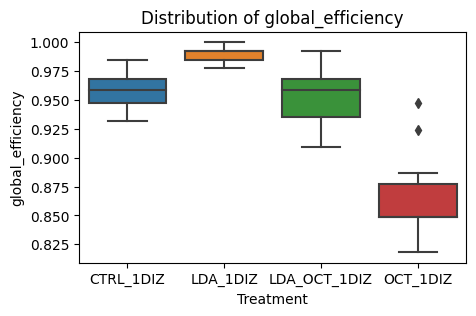

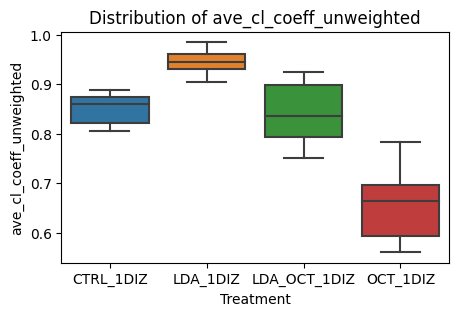

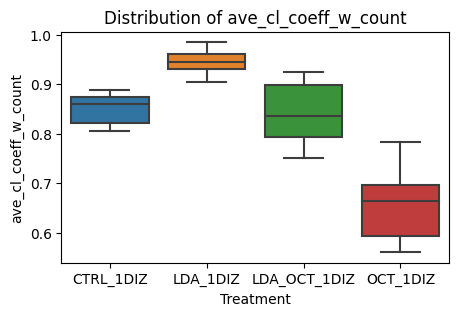

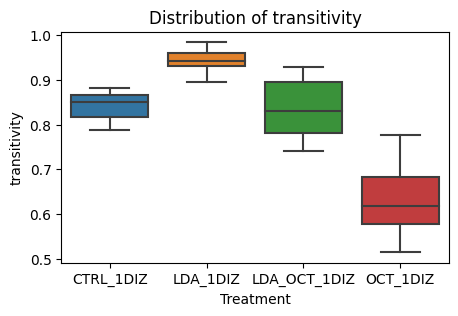

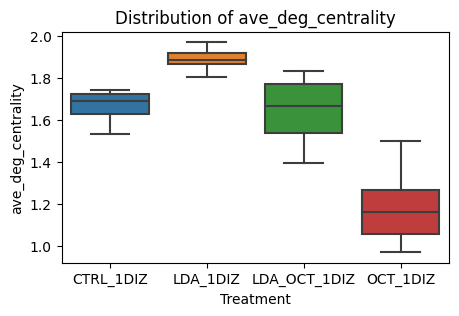

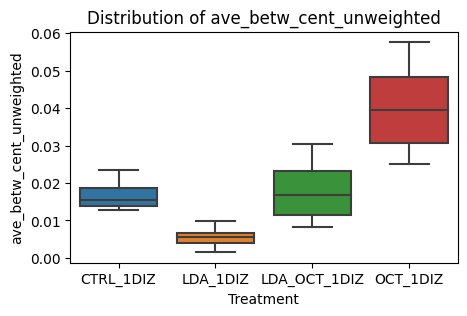

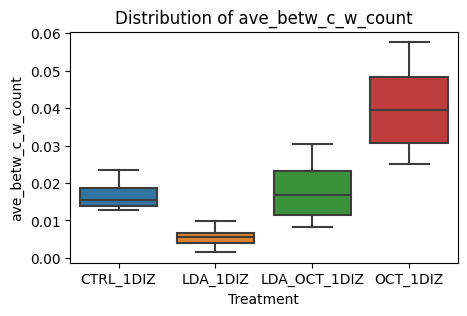

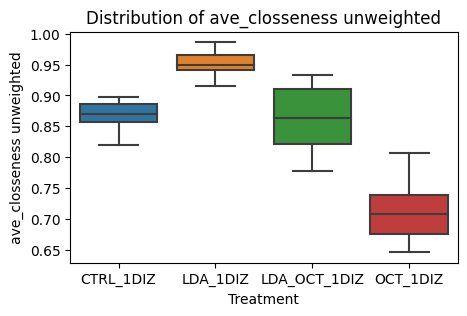

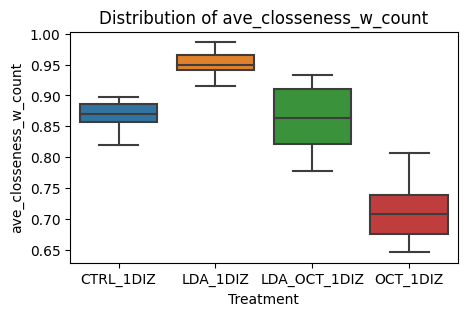

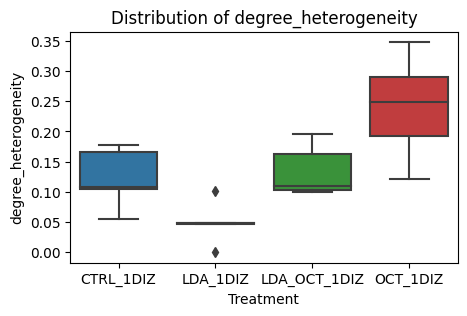

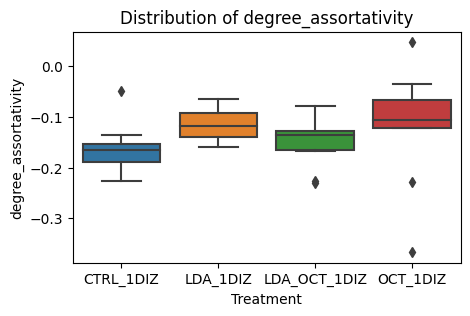

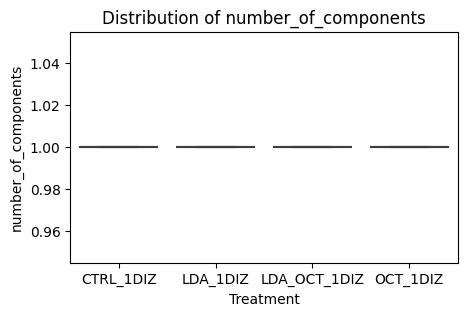

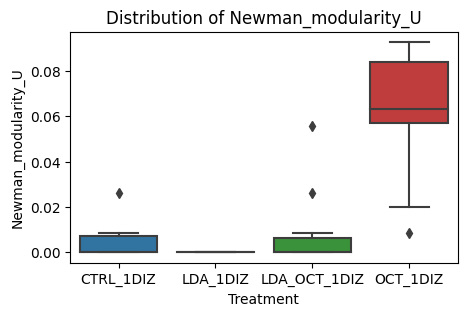

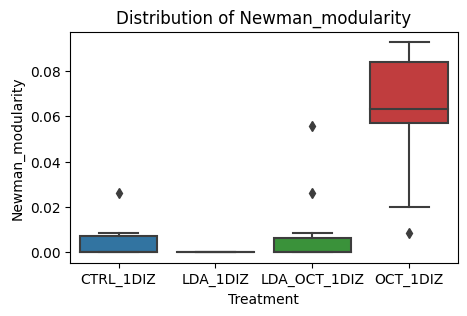

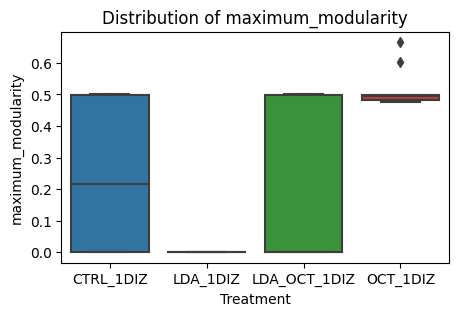

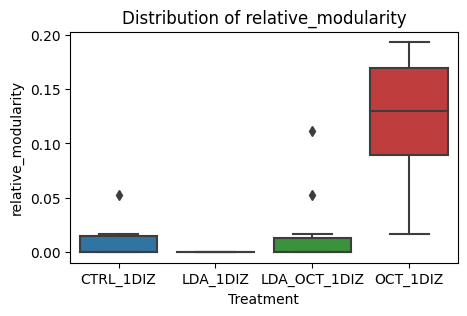

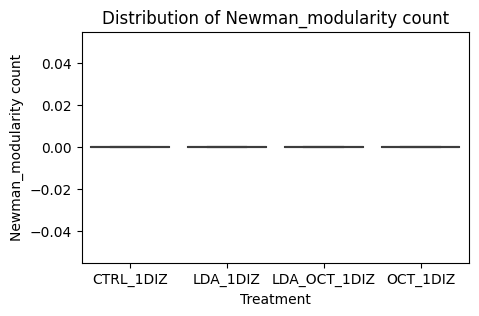

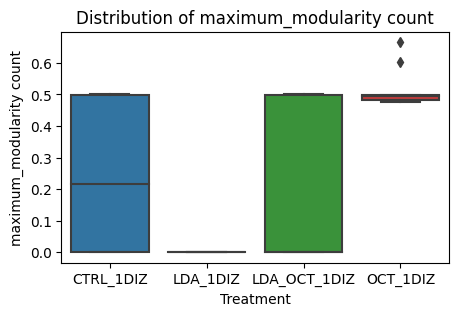

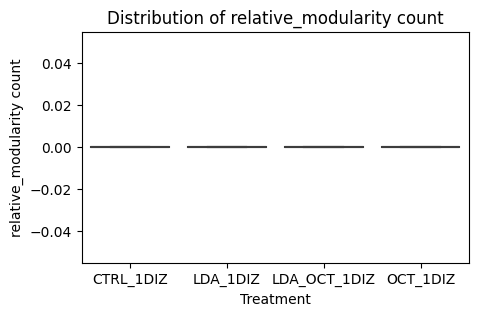

In [1]:
import os
import toml
from src import settings
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from src.utils import fileio

CONFIG_PATH = os.path.join(settings.CONFIG_DIR, "main.toml")
with open(CONFIG_PATH, "r") as file:
    config = toml.load(file)
TIME_WINDOW=config["TIME_WINDOW"]
INPUT_PATH = os.path.join(settings.RESULTS_DIR, "global_measures_snapshots", f"{TIME_WINDOW}_sec_window/")
all_treatments = fileio.load_multiple_folders(INPUT_PATH)
all_treatments = {key: value for key, value in all_treatments.items() if key in config["TREATMENTS"]}

dataframes = []
for treatment_name, treatment_path in all_treatments.items():
    all_groups = fileio.load_files_from_folder(treatment_path)
    treatment_dataframes = []
    for group_name, df_path in all_groups.items():
        df = pd.read_csv(df_path, index_col=0)  
        df['Group'] = group_name
        treatment_dataframes.append(df)

    combined_df = pd.concat(treatment_dataframes)
    combined_df = combined_df.set_index(['Group'], append=True)
    combined_df.index.names = ['Snapshot', 'Group']
    combined_df = combined_df.reorder_levels(['Group', 'Snapshot'])
    combined_df['Treatment'] = treatment_name
    combined_df = combined_df.set_index('Treatment', append=True)
    dataframes.append(combined_df)

combined_data = pd.concat(dataframes)

combined_data_reset = combined_data.reset_index()
for measure_name in combined_data.columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(data=combined_data_reset, x="Treatment", y=measure_name)
    plt.xlabel("Treatment")
    plt.ylabel(measure_name)
    plt.title(f'Distribution of {measure_name}')
    plt.show()